In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns', None)

deliveries = pd.read_csv('deliveries.csv')
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [3]:
#as the team name was changed making changes in the data for accurate anaylysis
deliveries = deliveries.replace('Delhi Daredevils', 'Delhi Capitals')




In [4]:
deliveries.shape

(179078, 21)

In [7]:
matches = pd.read_csv('matches.csv')
matches = matches.replace({'Delhi Daredevils': 'Delhi Capitals'})

In [8]:
matches.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

In [29]:
#checking matches between 'RCB' and 'KKR'
matches_rcb_kkr = matches[((matches['team1']=='Royal Challengers Bangalore')&(matches['team2']=='Kolkata Knight Riders'))|((matches['team2']=='Royal Challengers Bangalore')&(matches['team1']=='Kolkata Knight Riders'))]
matches_rcb_kkr.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
26,27,2017,Kolkata,2017-04-23,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,82,0,NM Coulter-Nile,Eden Gardens,CB Gaffaney,CK Nandan,NaN
44,45,2017,Bangalore,2017-05-07,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,6,SP Narine,M Chinnaswamy Stadium,AY Dandekar,C Shamshuddin,NaN
59,60,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
87,88,2008,Kolkata,2008-05-08,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,bat,normal,0,Kolkata Knight Riders,5,0,SC Ganguly,Eden Gardens,Asad Rauf,IL Howell,NaN
133,134,2009,Durban,2009-04-29,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Kingsmead,MR Benson,TH Wijewardene,NaN


# Q1. Who will win the match?

In [14]:
#checking total matches played by RCB
matches_rcb = matches[(matches['team1']=='Royal Challengers Bangalore')|(matches['team2']=='Royal Challengers Bangalore')]

wins_rcb = np.sum(matches_rcb.winner == 'Royal Challengers Bangalore')

print("Total matches played by RCB:", matches_rcb.shape[0])
print("Total matches won by RCB:", wins_rcb)
print("RCB winning percentage:", (wins_rcb/matches_rcb.shape[0]*100))

Total matches played by RCB: 180
Total matches won by RCB: 84
RCB winning percentage: 46.666666666666664


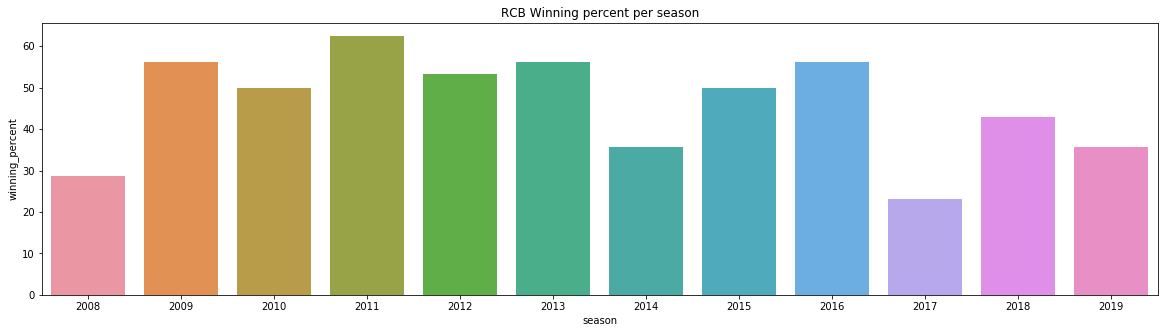

In [25]:
#checking RCB matches winning percentage per season

rcb_wins = matches_rcb[matches_rcb.winner == 'Royal Challengers Bangalore']
# matches['season'].unique()
rcb_season_wins = rcb_wins.groupby('season')['winner'].count().reset_index()
rcb_season_wins['total_matches_rcb']=matches_rcb.groupby('season')['id'].count().values
rcb_season_wins['winning_percent']= (rcb_season_wins.winner/rcb_season_wins.total_matches_rcb)*100

plt.figure(figsize=(20,5))
sns.barplot(x=rcb_season_wins['season'], y = rcb_season_wins['winning_percent'])
plt.title("RCB Winning percent per season")
plt.show()

In [23]:
#checking total matches played by KKR
matches_kkr = matches[(matches['team1']=='Kolkata Knight Riders')|(matches['team2']=='Kolkata Knight Riders')]

wins_kkr = np.sum(matches_kkr.winner == 'Kolkata Knight Riders')

print("Total matches played by KKR:", matches_kkr.shape[0])
print("Total matches won by KKR:", wins_kkr)
print("KKR winning percentage:", (wins_kkr/matches_kkr.shape[0]*100))

Total matches played by KKR: 178
Total matches won by KKR: 92
KKR winning percentage: 51.68539325842697


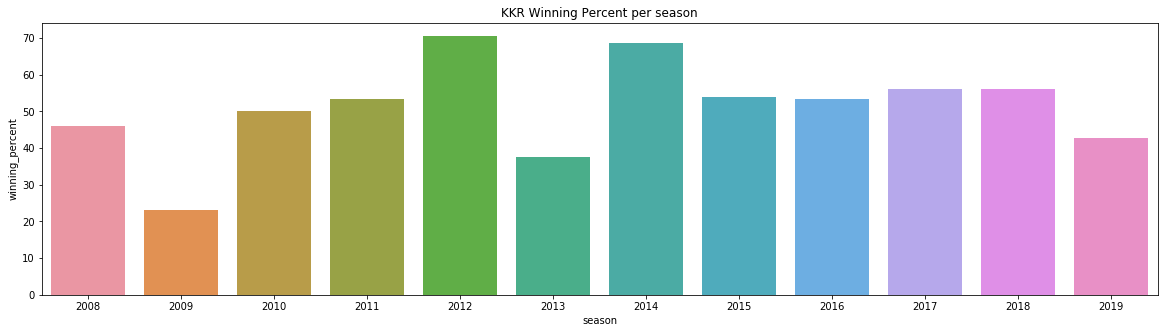

In [28]:
#checking Delhi Capitals matches winning percentage per season

kkr_wins = matches_kkr[matches_kkr.winner == 'Kolkata Knight Riders']
# matches['season'].unique()
kkr_season_wins = kkr_wins.groupby('season')['winner'].count().reset_index()
kkr_season_wins['total_matches_kkr']=matches_kkr.groupby('season')['id'].count().values
kkr_season_wins['winning_percent']= (kkr_season_wins.winner/kkr_season_wins.total_matches_kkr)*100

plt.figure(figsize=(20,5))
sns.barplot(x=kkr_season_wins['season'], y = kkr_season_wins['winning_percent'])
plt.title('KKR Winning Percent per season')
plt.show()

**Inference:**
    From the graphs above we can clearly see that KKR has a higher winning percentage than RCB mostly in all seasons (except a few) however KKR is more consistent with their performance

season  winner                     
2008    Kolkata Knight Riders          100.0
2009    Royal Challengers Bangalore    100.0
2010    Kolkata Knight Riders           50.0
        Royal Challengers Bangalore     50.0
2011    Royal Challengers Bangalore    100.0
2012    Kolkata Knight Riders          100.0
2013    Kolkata Knight Riders           50.0
        Royal Challengers Bangalore     50.0
2014    Kolkata Knight Riders          100.0
2015    Royal Challengers Bangalore    100.0
2016    Kolkata Knight Riders           50.0
        Royal Challengers Bangalore     50.0
2017    Kolkata Knight Riders          100.0
2018    Kolkata Knight Riders          100.0
2019    Kolkata Knight Riders           50.0
        Royal Challengers Bangalore     50.0
Name: winner, dtype: float64

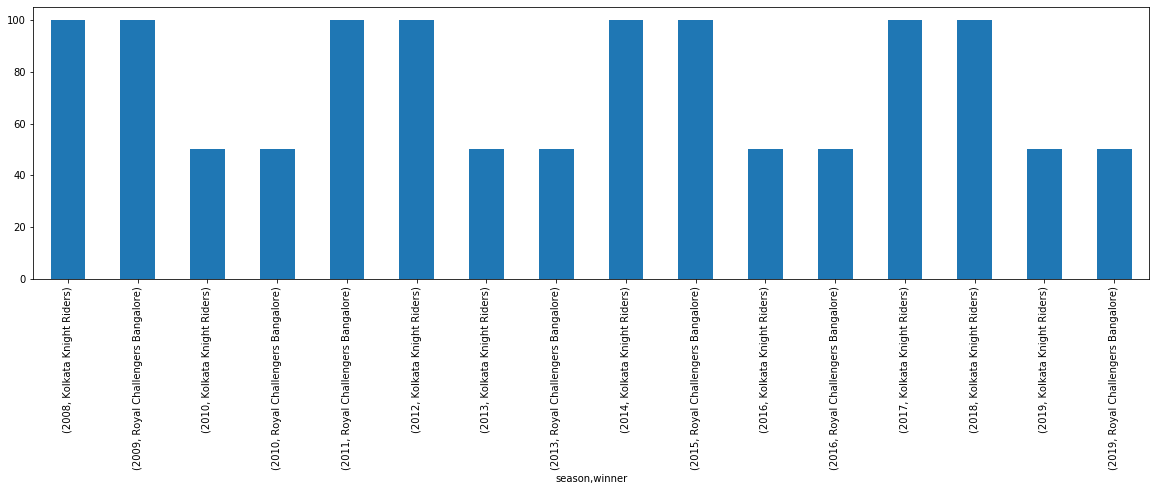

In [60]:
#Now lets see how RCB has performed over KKR
res = matches_rcb_kkr.groupby('season')['winner'].value_counts(normalize=True)*100
display(res)

plt.figure(figsize=(20,5))
res.plot(kind='bar')
plt.show()

## Q1 Solution:

###  From 2008 -2016 kkr and rcb have almost equal chances of winning however tred has changed kkr becoming a stronger team with consistent performace, so chances of KKR wiining are higher than RCB.

# Q2. What will the toss winning captain decide to do first?

In [53]:
#checking toss decisions taken by MI
matches_rcb.toss_decision.value_counts()

field    126
bat       54
Name: toss_decision, dtype: int64

In [54]:
#checking toss decisions taken by DC
matches_kkr.toss_decision.value_counts() 

field    115
bat       63
Name: toss_decision, dtype: int64

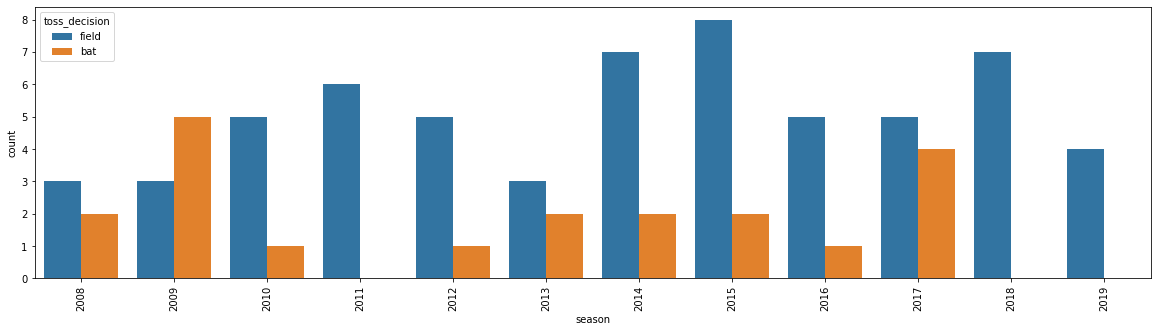

In [57]:
#checking if mi team decides toss decision on basis of season
df = matches_rcb.loc[matches_rcb.toss_winner=='Royal Challengers Bangalore',['season', 'venue', 'toss_decision']]

plt.figure(figsize=(20,5))
sns.countplot(df['season'], hue=df['toss_decision'])
plt.xticks(rotation=90);

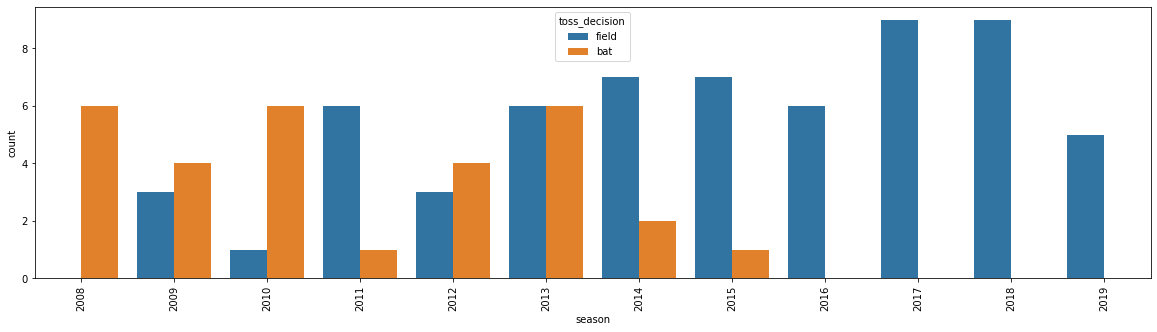

In [59]:
#checking if mi team decides toss decision on basis of season
df = matches_kkr.loc[matches_kkr.toss_winner=='Kolkata Knight Riders',['season', 'venue', 'toss_decision']]

plt.figure(figsize=(20,5))
sns.countplot(df['season'], hue=df['toss_decision'])
plt.xticks(rotation=90);

**Inference:**
    - We can see mostly RCB choose to Bat and win as well, whearas KKR is strong at fielding, so if RCB wins they will choose to bat. predicting it will win.

# Q3. How many runs will Dinesh Karthik score in the match?

In [106]:
deliveries.batsman.sort_values().unique()

array(['A Ashish Reddy', 'A Chandila', 'A Chopra', 'A Choudhary',
       'A Dananjaya', 'A Flintoff', 'A Hales', 'A Joseph', 'A Kumble',
       'A Mishra', 'A Mithun', 'A Mukund', 'A Nehra', 'A Singh',
       'A Symonds', 'A Turner', 'A Uniyal', 'A Zampa', 'AA Bilakhia',
       'AA Chavan', 'AA Jhunjhunwala', 'AA Noffke', 'AB Agarkar',
       'AB Barath', 'AB Dinda', 'AB McDonald', 'AB de Villiers',
       'AC Blizzard', 'AC Gilchrist', 'AC Thomas', 'AC Voges',
       'AD Mascarenhas', 'AD Mathews', 'AD Nath', 'AD Russell',
       'AF Milne', 'AG Murtaza', 'AG Paunikar', 'AJ Finch', 'AJ Tye',
       'AL Menaria', 'AM Nayar', 'AM Rahane', 'AN Ahmed', 'AN Ghosh',
       'AP Dole', 'AP Majumdar', 'AP Tare', 'AR Bawne', 'AR Patel',
       'AS Rajpoot', 'AS Raut', 'AS Yadav', 'AT Rayudu', 'AUK Pathan',
       'Abdur Razzak', 'Anirudh Singh', 'Ankit Sharma', 'Ankit Soni',
       'Anureet Singh', 'Avesh Khan', 'Azhar Mahmood', 'B Akhil',
       'B Chipli', 'B Kumar', 'B Laughlin', 'B Lee', 'B

In [108]:
np.sum(deliveries.batsman.sort_values().unique() == 'KD Karthik')

1

In [109]:
deliveries[deliveries['batsman']=='KD Karthik'].groupby('match_id')['batsman_runs'].sum()

match_id
3         47
6         30
13         3
16        48
20         1
23         3
26        58
34         2
38        29
41        65
46        35
49        40
52         0
73        24
76         2
82        28
87         6
93        13
104        6
109       56
115       10
125       18
129       12
133        4
136       41
141       52
150        5
154       17
158       44
161       32
        ... 
633       26
635       26
7896      39
7898      27
7903      32
7906      20
7908      42
7911      45
7919      18
7922      23
7926      48
7930      40
7934       5
7937      51
7942      42
7947      28
7951      52
7952       8
11138      2
11142      1
11146     52
11153     20
11314     19
11317      2
11320     20
11329      6
11334    101
11338     16
11343     22
11347      4
Name: batsman_runs, Length: 162, dtype: int64

In [110]:
rs_runs = deliveries[deliveries['batsman']=='KD Karthik'].groupby('match_id')['batsman_runs'].sum().values

print(f'Average runs scored by KD Karthik: {np.mean(rs_runs)}')
print(f'Median runs scored by  KD Karthik: {np.median(rs_runs)}')
print(f'Minimum runs scored by  KD Karthik: {np.min(rs_runs)}')
print(f'Maximum runs scored by  KD Karthik: {np.max(rs_runs)}')



Average runs scored by KD Karthik: 22.765432098765434
Median runs scored by  KD Karthik: 20.0
Minimum runs scored by  KD Karthik: 0
Maximum runs scored by  KD Karthik: 101


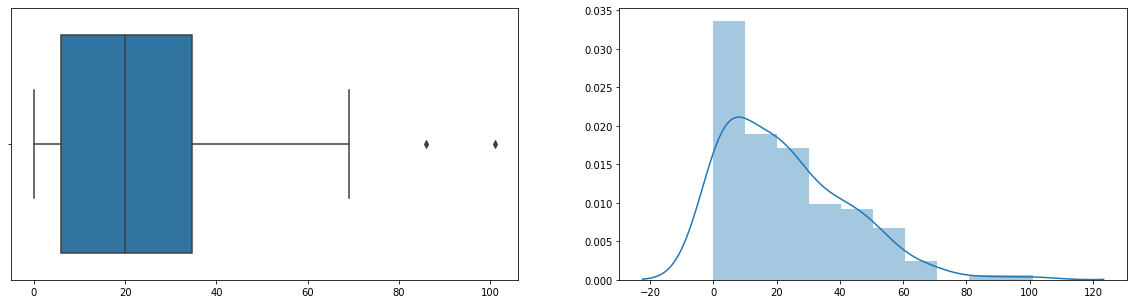

In [111]:
# #checking visually

fig, ax = plt.subplots(1,2, figsize=(20,5))


sns.boxplot(rs_runs, ax=ax[0]);
sns.distplot(rs_runs, ax=ax[1])

In [115]:
#checking how many runs rohit sharma scored each match between MI and DC

rs_bats = deliveries[deliveries['batsman']=='KD Karthik']

#getting matches between RCB and KKR
rs_bats[rs_bats.bowling_team =='Royal Challengers Bangalore'].groupby('match_id')['batsman_runs'].sum()

match_id
20        1
76        2
104       6
129      12
167      31
197      17
209       6
280      20
360      44
367      16
383      60
417      43
459       0
495       1
595      50
620       2
633      26
7896     39
7922     23
11153    20
Name: batsman_runs, dtype: int64

**Inference:**
    We can see that KD karthik has a good performance on an average agaianst RCB he has scores around 20-30's on average

# Q5. How many 4's will Virat Kohli take in the match

In [78]:
vkohli_runs = deliveries[deliveries['batsman']=='V Kohli']
vkohli_runs


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
2590,12,1,Royal Challengers Bangalore,Mumbai Indians,1,2,V Kohli,CH Gayle,TG Southee,0,1,0,0,0,0,0,1,1,NaN,NaN,NaN
2591,12,1,Royal Challengers Bangalore,Mumbai Indians,1,3,V Kohli,CH Gayle,TG Southee,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
2593,12,1,Royal Challengers Bangalore,Mumbai Indians,1,5,V Kohli,CH Gayle,TG Southee,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2594,12,1,Royal Challengers Bangalore,Mumbai Indians,1,6,V Kohli,CH Gayle,TG Southee,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
2597,12,1,Royal Challengers Bangalore,Mumbai Indians,2,1,V Kohli,CH Gayle,Harbhajan Singh,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2598,12,1,Royal Challengers Bangalore,Mumbai Indians,2,2,V Kohli,CH Gayle,Harbhajan Singh,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
2603,12,1,Royal Challengers Bangalore,Mumbai Indians,3,1,V Kohli,CH Gayle,TG Southee,0,0,0,0,0,0,6,0,6,NaN,NaN,NaN
2604,12,1,Royal Challengers Bangalore,Mumbai Indians,3,2,V Kohli,CH Gayle,TG Southee,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
2605,12,1,Royal Challengers Bangalore,Mumbai Indians,3,3,V Kohli,CH Gayle,TG Southee,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
2606,12,1,Royal Challengers Bangalore,Mumbai Indians,3,4,V Kohli,CH Gayle,TG Southee,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN


In [89]:
vkohli_4s = vkohli_runs[vkohli_runs['batsman_runs']==4]

vkohli_4s.groupby('match_id')['batsman_runs'].count().head()

match_id
12    5
17    3
20    7
33    4
42    1
Name: batsman_runs, dtype: int64

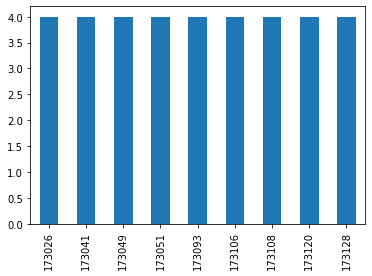

In [91]:
#checking vkohli 
vkohli_4s_kkr = vkohli_4s[vkohli_4s['bowling_team']=='Kolkata Knight Riders']

vkohli_4s_kkr.groupby('match_id')['batsman_runs'].plot(kind='bar');

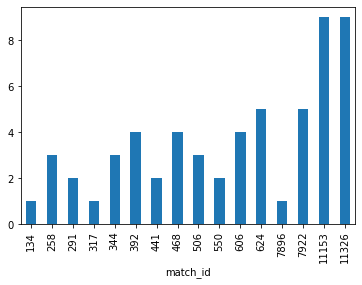

In [88]:
vkohli_4s_kkr.groupby('match_id')['batsman_runs'].count().plot(kind='bar')

**Inference:**
    - As per graph we can say safely that kohli mostly scores well if in form however sometimes his average is 4 4's but in last 3 matches with kkr he has scored 5-9 4's, also Kohli seems to be in form so we can safely say he wil score 5 or more 4's

# Q4. How many no-balls will be bowled in total during the match?

In [66]:
deliveries['noball_runs'].value_counts()

0    178364
1       698
2         9
5         6
3         1
Name: noball_runs, dtype: int64

In [67]:
noballs_bowls = deliveries[deliveries.noball_runs!=0]

#counting no ball runs during a match
noballs_bowls.groupby('match_id')['ball'].count().head()

match_id
1     2
7     3
10    1
11    2
12    1
Name: ball, dtype: int64

In [68]:
#checking wide bowls only when RCB is playing
noballs_rcb = noballs_bowls[(noballs_bowls.batting_team=='Royal Challengers Bangalore')|(noballs_bowls.bowling_team=='Royal Challengers Bangalore')]

noballs_rcb.groupby('match_id')['ball'].count().head()

match_id
1     2
12    1
27    2
30    2
55    1
Name: ball, dtype: int64

In [69]:
nb_rcb_count = noballs_rcb.groupby('match_id')['ball'].count().values

print(f'Average wide bowls by Royal Challengers Bangalore in a match: {np.mean(nb_rcb_count)}')
print(f'Median  wide bowls by Royal Challengers Bangalore in a match: {np.median(nb_rcb_count)}')
print(f'Minimum  wide bowls by Royal Challengers Bangalore in a match: {np.min(nb_rcb_count)}')
print(f'Maximum  wide bowls by Royal Challengers Bangalore in a match: {np.max(nb_rcb_count)}')

Average wide bowls by Royal Challengers Bangalore in a match: 1.6339285714285714
Median  wide bowls by Royal Challengers Bangalore in a match: 1.0
Minimum  wide bowls by Royal Challengers Bangalore in a match: 1
Maximum  wide bowls by Royal Challengers Bangalore in a match: 5


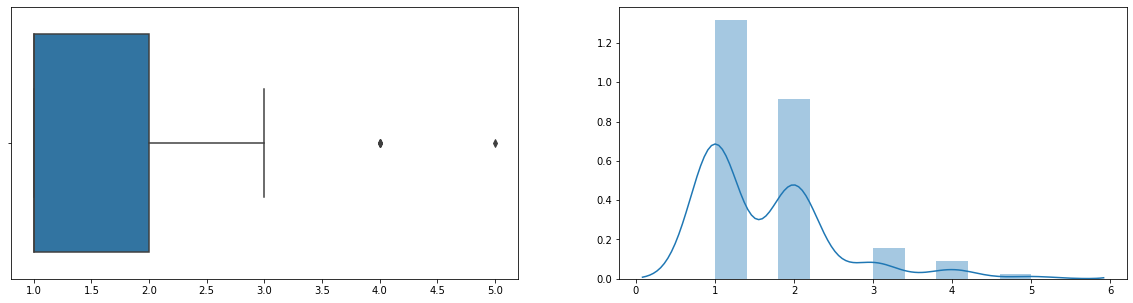

In [70]:
#chekcing visually
fig, ax = plt.subplots(1,2 , figsize=(20,5))

sns.boxplot(nb_rcb_count, ax = ax[0])
sns.distplot(nb_rcb_count, ax=ax[1])


In [71]:
#checking wide bowls only when DC is playing
noballs_kkr = noballs_bowls[(noballs_bowls.batting_team=='Kolkata Knight Riders')|(noballs_bowls.bowling_team=='Kolkata Knight Riders')]

noballs_rcb.groupby('match_id')['ball'].count().head()

match_id
1     2
12    1
27    2
30    2
55    1
Name: ball, dtype: int64

In [72]:
nb_kkr_count = noballs_kkr.groupby('match_id')['ball'].count().values

print(f'Average wide bowls by Kolkata Knight Riders in a match: {np.mean(nb_kkr_count)}')
print(f'Median  wide bowls by Kolkata Knight Riders in a match: {np.median(nb_kkr_count)}')
print(f'Minimum  wide bowls by Kolkata Knight Riders in a match: {np.min(nb_kkr_count)}')
print(f'Maximum  wide bowls by Kolkata Knight Riders in a match: {np.max(nb_kkr_count)}')

Average wide bowls by Kolkata Knight Riders in a match: 1.6129032258064515
Median  wide bowls by Kolkata Knight Riders in a match: 1.0
Minimum  wide bowls by Kolkata Knight Riders in a match: 1
Maximum  wide bowls by Kolkata Knight Riders in a match: 5


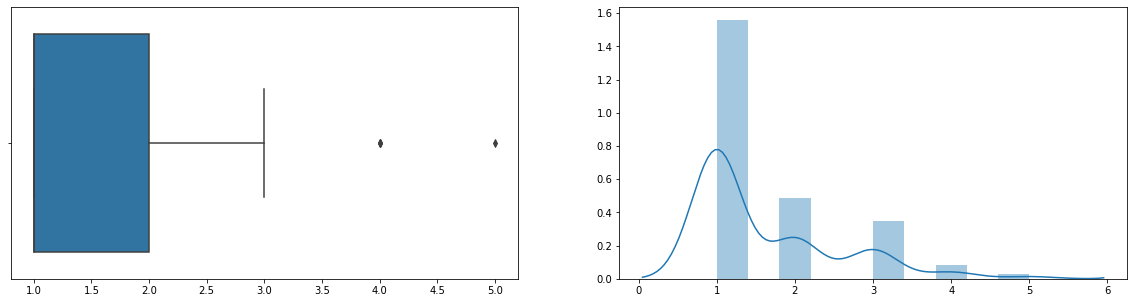

In [73]:
#chekcing visually
fig, ax = plt.subplots(1,2 , figsize=(20,5))

sns.boxplot(nb_kkr_count, ax = ax[0])
sns.distplot(nb_kkr_count, ax=ax[1])


In [74]:
#lets also check the matches played between KKR and RCB
nb_rcb_kkr = noballs_bowls[((noballs_bowls.batting_team=='Kolkata Knight Riders')&(noballs_bowls.bowling_team=='Royal Challengers Bangalore'))|((noballs_bowls.batting_team=='Royal Challengers Bangalore')&(noballs_bowls.bowling_team=='Kolkata Knight Riders'))]

nb_rcb_kkr.groupby('match_id')['ball'].count()

match_id
27       2
88       1
156      4
178      1
258      1
344      1
392      3
468      1
506      2
550      1
606      2
624      1
11153    3
Name: ball, dtype: int64

In [75]:
nb_rcbkkr = nb_rcb_kkr.groupby('match_id')['ball'].count()

print(f'Average wide bowls in (RCB and KKR) match: {np.mean(nb_rcbkkr)}')
print(f'Median  wide bowls in (RCB and KKR) match: {np.median(nb_rcbkkr)}')
print(f'Minimum  wide bowls in (RCB and KKR) match: {np.min(nb_rcbkkr)}')
print(f'Maximum  wide bowls in (RCB and KKR) match: {np.max(nb_rcbkkr)}')

Average wide bowls in (RCB and KKR) match: 1.7692307692307692
Median  wide bowls in (RCB and KKR) match: 1.0
Minimum  wide bowls in (RCB and KKR) match: 1
Maximum  wide bowls in (RCB and KKR) match: 4


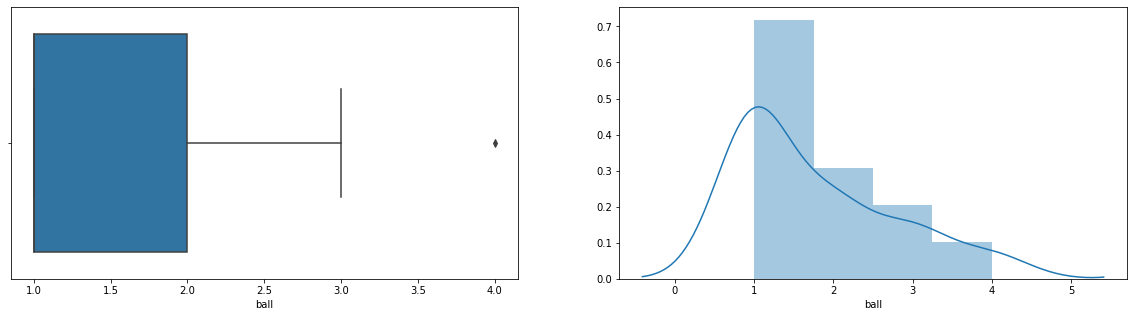

In [76]:
#chekcing visually
fig, ax = plt.subplots(1,2 , figsize=(20,5))

sns.boxplot(nb_rcbkkr, ax = ax[0])
sns.distplot(nb_rcbkkr, ax=ax[1])

**Inference:**
    So from all the plots and graphs above we have understood 
        - RCB on an average has around 1 no bowls in a match
        - KKR on an average has around 1 no bowls in a match
        - we also checked RCB-KKR match, where we found on average they have 1 noball bowls